In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd
import scipy
import math
import sys

%matplotlib inline

Using TensorFlow backend.


In [3]:
def plot_graph(k, labels, predicted_labels):
    hist = []
    for i in range(k):
        hist.append([])
    
    for i in range(len(labels)):
        hist[labels[i]].append(predicted_labels[i])

    plt.hist(hist)

In [15]:
def iter_kmeans(points, k, epochs=10000, y=None):
    not_finished = True
    random_mask = np.random.choice(points.shape[0], k, replace=False)
    centroids = points[random_mask, :]
    epoch = 0
    labels = []
    
    while not_finished and epoch < epochs:
        labels = []

        for point in points:
            shortest_i, shortest_distance = None, 10000000000
            print(0)
            for i, centroid in enumerate(centroids):
                distance = scipy.spatial.distance.euclidean(point, centroid)
                if distance <= shortest_distance:
                    print(1)
                    shortest_distance = distance
                    shortest_i = i
            labels.append(shortest_i)

        labels = np.array(labels)
        not_finished = False

        for i in range(k):
            new_centroid = np.mean(points[np.where(labels == i)], axis=0)
            if not np.all(np.isclose(new_centroid, centroids[i])):
                centroids[i] = new_centroid
                not_finished = True

        if epoch != 0 and epoch % (epochs // 10) == 0:
            print(epoch)
        epoch = epoch + 1

    if y is not None:
        plot_graph(k, y, labels)
    return labels, centroids


0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
0
1
1
0
1
1
0
1
1
0
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
0
1
0
1
0
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
0
1
1
0
1
1
0
1
1
0
1
0
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
0
1
0
1
0
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
0
1
1
0
1
1
0
1
1
0
1
0
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
0
1
0
1
0
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1


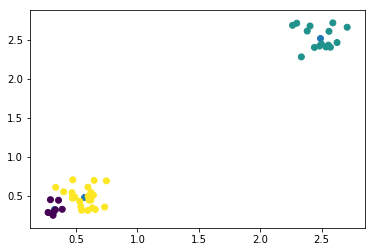

In [31]:
k = 3
points = []
for i in range(k):
    points.extend((np.random.rand(15, 2)) / 2 + (i - 1.5) * (i - 1.5))

points = np.array(points)
labels, centroids = iter_kmeans(points, k)

plt.scatter(centroids[:, 0], centroids[:, 1])
plt.scatter(points[:, 0], points[:, 1], c=labels)

In [36]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [37]:
mask_0 = np.where(y_train == 0)
mask_1 = np.where(y_train == 1)

In [8]:
sub_x_train = np.concatenate((x_train[mask_0][:500], x_train[mask_1][:500]))
sub_y_train = np.concatenate((y_train[mask_0][:500], y_train[mask_1][:500]))

In [40]:
labels, centroids = iter_kmeans(x_train, 10, epochs=100, y=y_train)

0
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
0
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
0
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
0
1
0
1
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1


0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
0
1
1
0
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
0
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0


1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
0
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
0
1
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
0
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1


0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
0
1
1
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
0
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
0
1
0
1
1
0
1
1
1
0
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
0
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1


1
0
1
1
0
1
1
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
0
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
0
1


0
1
1
1
1
1
0
1
1
0
1
1
1
0
1
0
1
1
1
1
0
1
0
1
1
1
1
0
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
0
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
0
1
1
1
0
1
1
1
1
0
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
0
1
0
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
0
1
1
1
1
1
0
1


KeyboardInterrupt: 

In [138]:
np.unique(labels)

array([1, 2])

In [139]:
x_train.shape

(60000, 784)

In [141]:
x_test.shape

(10000, 28, 28)

In [17]:
from keras.layers import Input, Dense
from keras.models import Model

In [42]:
encoding_dim = 32  

input_img = Input(shape=(x_train.shape[0],))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='linear')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(x_train.shape[0], activation='linear')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='sgd', loss='binary_crossentropy')

In [41]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

ValueError: Error when checking input: expected input_7 to have shape (60000,) but got array with shape (784,)